In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For today's lab, we will explore a real world dataset - Singapore HDB resale prices and see if we can build a linear regression model that is able to predict a flat's resale price. Remember to look through the data dictionary to understand the data attributes https://data.gov.sg/dataset/resale-flat-prices

In [2]:
hdb = pd.read_csv('data/hdb/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')

### 1. How many rows and columns does the dataset have?

In [3]:
hdb.shape

(59809, 11)

### 2. What is the outcome / dependent variable we are trying to predict?

In [4]:
# predict resale price 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


#### Resale price

#### We will apply some basic transformations to create additional columns which will be useful for our model 

- **apply**: applies a function on the dataframe
- **lambda**: python anonymous function syntax, alternative to defining and creating a function separately

In [4]:
hdb = hdb.rename(columns={'month': 'year-month'})
hdb['year'] = hdb['year-month'].apply(lambda x: int(x.split("-")[0]))
hdb['month'] = hdb['year-month'].apply(lambda x: int(x.split("-")[1]))
hdb['lower_storey_bound'] = hdb['storey_range'].apply(lambda x: int(x.split()[0]))
hdb['upper_storey_bound'] = hdb['storey_range'].apply(lambda x: int(x.split()[2]))

In [6]:
hdb.head()

,year-month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month,lower_storey_bound,upper_storey_bound
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015,1,1,3
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,2015,1,1,3
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,2015,1,1,3
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,2015,1,7,9


### 3. Plot the distribution of resale prices using the distplot function from the seaborn (sns) library

C:\Users\r15\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


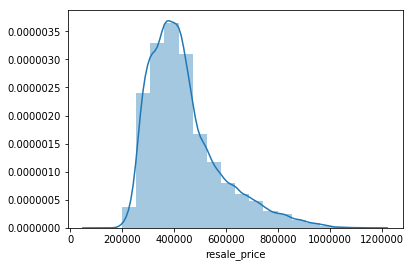

In [5]:
sns.distplot(hdb['resale_price'], bins = 20)

### 4. Use the describe function to obtain descriptive statistics about resale price i.e. mean, 50th percentile

In [6]:
hdb['resale_price'].describe()

count    5.980900e+04
mean     4.394339e+05
std      1.415803e+05
min      9.050000e+04
25%      3.400000e+05
50%      4.100000e+05
75%      5.000000e+05
max      1.180000e+06
Name: resale_price, dtype: float64

### 5. Create a scatter plot of resale_price and floor_area_sqm using the pairplot function from Seaborn and include a regression line

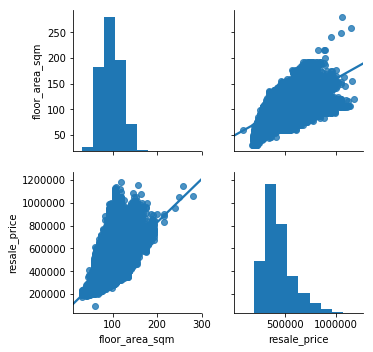

In [9]:
sns.pairplot(hdb, vars = ['floor_area_sqm', 'resale_price'], kind = 'reg')
plt.show()

There looks to be a strong linear correlation between floor_area_sqm and resale_price

### 6. Using Scikit Learn create a Linear Regression Model to predict resale_price based on floor_area_sqm. What are the coefficients of the model?

In [11]:
# Define variables
linreg = LinearRegression()
X = hdb[['floor_area_sqm']]
y = hdb['resale_price']

# Invoke linear regression
linreg.fit(X,y)

# Print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

69670.3473554682
[3799.49236349]


### 7. Let's include a more quantitative variables into the model. Compute the correlations between floor_area_sqm, lower_storey_bound, upper_storey_bound, remaining_lease, and resale_price 

In [19]:
hdb_r = hdb.copy()
del hdb_r['lease_commence_date'], hdb_r['year'], hdb_r['month']
hdb_r = hdb_r[['floor_area_sqm', 'lower_storey_bound', 'upper_storey_bound', 'remaining_lease', 'resale_price']]
hdb_r.corr()

,floor_area_sqm,lower_storey_bound,upper_storey_bound,remaining_lease,resale_price
floor_area_sqm,1.000000,0.043150,0.043150,0.353459,0.648536
lower_storey_bound,0.043150,1.000000,1.000000,0.272584,0.378199
upper_storey_bound,0.043150,1.000000,1.000000,0.272584,0.378199
remaining_lease,0.353459,0.272584,0.272584,1.000000,0.355297
resale_price,0.648536,0.378199,0.378199,0.355297,1.000000


### 8. Using the heatmap function from the Seaborn library, display the correlation matrix as a heatmap 

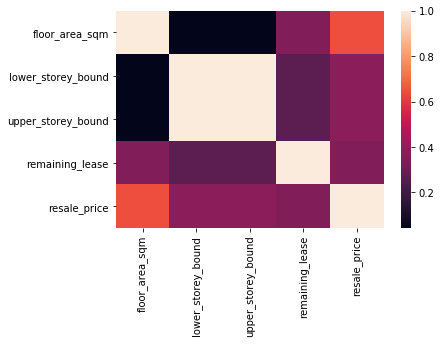

In [53]:
sns.heatmap(hdb_r.corr())
plt.show()

Notice the presence of multicollinearity (high correlation between the lower and upper storey bounds). This is a trivial example as we derived both of these columns from the same original column but serves as a reminder about the importance of checking the correlations between variables before we include them in the model construction

### 9. Create a multi-variate Linear Regression Model including the variables floor_area_sqm, upper_storey_bound and remaining_lease to determine resale_prices

In [54]:
# Define variables
linreg = LinearRegression()
X = hdb[['floor_area_sqm', 'upper_storey_bound', 'remaining_lease']]
y = hdb['resale_price']

# Invoke linear regression
model2 = linreg.fit(X,y)

# Print the coefficients
print(model2.intercept_)
print(model2.coef_)

-35619.51784143568
[3622.06731257 8712.29519563  555.53283776]


### 10. Let's use this model to predict the prices of new BTO flats

In [63]:
new_release = pd.DataFrame({'floor_area_sqm': [100, 120], 'upper_storey_bound': [12, 5],  'remaining_lease': [5, 5]})
new_release.head()

,floor_area_sqm,upper_storey_bound,remaining_lease
0,100,12,5
1,120,5,5


In [64]:
#new_release['pred_price'] = linreg.coef_[0]*hdb['floor_area_sqm'] + linreg.coef_[1]*hdb['upper_storey_bound'] + linreg.coef_[2]*hdb['remaining_lease'] + linreg.intercept_
#new_release.head()
model2.predict(new_release)

array([433912.41995152, 445367.69983348])

### 11. Intuitively, the area of the flat i.e. town should have an association with the flat_price, let's explore this association 

In [ ]:
# TODO

### 12. Using pd.get_dummies, lets add Town into the model as well

In [37]:
town_dummies = pd.get_dummies(hdb.town, prefix='TOWN')
hdb_town = pd.concat([hdb, town_dummies], axis=1)
factors = list(town_dummies.columns) + ["upper_storey_bound", "floor_area_sqm", "remaining_lease"]
factors

['TOWN_ANG MO KIO',
 'TOWN_BEDOK',
 'TOWN_BISHAN',
 'TOWN_BUKIT BATOK',
 'TOWN_BUKIT MERAH',
 'TOWN_BUKIT PANJANG',
 'TOWN_BUKIT TIMAH',
 'TOWN_CENTRAL AREA',
 'TOWN_CHOA CHU KANG',
 'TOWN_CLEMENTI',
 'TOWN_GEYLANG',
 'TOWN_HOUGANG',
 'TOWN_JURONG EAST',
 'TOWN_JURONG WEST',
 'TOWN_KALLANG/WHAMPOA',
 'TOWN_MARINE PARADE',
 'TOWN_PASIR RIS',
 'TOWN_PUNGGOL',
 'TOWN_QUEENSTOWN',
 'TOWN_SEMBAWANG',
 'TOWN_SENGKANG',
 'TOWN_SERANGOON',
 'TOWN_TAMPINES',
 'TOWN_TOA PAYOH',
 'TOWN_WOODLANDS',
 'TOWN_YISHUN',
 'upper_storey_bound',
 'floor_area_sqm',
 'remaining_lease']

In [58]:
# Define variables
linreg = LinearRegression()
X = hdb_town[factors]
y = hdb_town['resale_price']

# Invoke linear regression
model3 = linreg.fit(X,y)

# Print the coefficients
print(model3.intercept_)
print(model3.coef_)

-282341.62424685754
[  31263.3999354     8896.32191299  117003.89405524  -54965.96794964
  118884.44856334 -117591.14821367  211312.16150097  188395.75735186
 -157409.57305312   64686.50211291   53201.05213811  -57208.7296355
  -30919.8252128  -101247.93148661   80399.73108916  172814.38405235
 -105516.78036885 -112743.46228437  133140.25789074 -161245.18414056
 -119584.55480577   16660.16376931  -32207.07908146   69477.95181598
 -139572.26154141  -75923.52841461    4617.70662258    4237.73048111
    4128.98050587]


### 13. Use this updated model to predict the prices of new BTO flats

In [60]:
new_release = pd.DataFrame({'upper_storey_bound': [12, 5], 'floor_area_sqm': [100, 120], 'remaining_lease': [80, 85],
                          'town': ['ANG MO KIO', 'SENGKANG']})

In [61]:
new_release_town = pd.get_dummies(new_release, prefix="TOWN")
new_release_town = new_release_town.reindex(columns = factors, fill_value=0)

In [62]:
model3.predict(new_release_town)

array([558425.74374072, 480653.35479309])